In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The data is from a public dataset by NYT

In [3]:
df = pd.read_csv("C:/Users/micha/Downloads/us-counties-covid-19-dataset (1)/us-counties.csv")

In [4]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [5]:
df.tail()

,date,county,state,fips,cases,deaths
123944,2020-05-07,Sublette,Wyoming,56035.0,3,0
123945,2020-05-07,Sweetwater,Wyoming,56037.0,19,0
123946,2020-05-07,Teton,Wyoming,56039.0,98,1
123947,2020-05-07,Uinta,Wyoming,56041.0,8,0
123948,2020-05-07,Washakie,Wyoming,56043.0,7,0


The features that we have for the data is data,state,county,fips(specific code for counties),cases(number of cases), deaths(total number of deaths due to COVID-19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123949 entries, 0 to 123948
Data columns (total 6 columns):
date      123949 non-null object
county    123949 non-null object
state     123949 non-null object
fips      122518 non-null float64
cases     123949 non-null int64
deaths    123949 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 5.7+ MB


In [7]:
df.describe()

,fips,cases,deaths
count,122518.000000,123949.000000,123949.000000
mean,29896.229428,234.038346,12.072901
std,15414.232805,2673.802630,240.410753
min,1001.000000,0.000000,0.000000
25%,18041.000000,3.000000,0.000000
50%,29023.000000,11.000000,0.000000
75%,45019.000000,51.000000,1.000000
max,56043.000000,185653.000000,19141.000000


fips feature seems to be the only features with missing values let explore that

In [9]:
df.loc[df["fips"].isnull()]

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0
418,2020-03-01,Unknown,Rhode Island,NaN,2,0
448,2020-03-02,New York City,New York,NaN,1,0
450,2020-03-02,Unknown,Rhode Island,NaN,2,0
482,2020-03-03,New York City,New York,NaN,2,0
...,...,...,...,...,...,...
123372,2020-05-07,Unknown,Tennessee,NaN,77,0
123619,2020-05-07,Unknown,Utah,NaN,1,3
123635,2020-05-07,Unknown,Vermont,NaN,4,0
123639,2020-05-07,Unknown,Virgin Islands,NaN,66,4


In [11]:
df.loc[df["county"] == "New York City"]

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0
448,2020-03-02,New York City,New York,NaN,1,0
482,2020-03-03,New York City,New York,NaN,2,0
518,2020-03-04,New York City,New York,NaN,2,0
565,2020-03-05,New York City,New York,NaN,4,0
...,...,...,...,...,...,...
111211,2020-05-03,New York City,New York,NaN,179728,18451
114090,2020-05-04,New York City,New York,NaN,181034,18580
116969,2020-05-05,New York City,New York,NaN,182318,18719
119855,2020-05-06,New York City,New York,NaN,183770,18993


Some of the Counties are not known which is fine it should affect our analysis too much. We will likely end up binarzing this

In [12]:
df.loc[df["county"] == "Unknown"]

,date,county,state,fips,cases,deaths
418,2020-03-01,Unknown,Rhode Island,NaN,2,0
450,2020-03-02,Unknown,Rhode Island,NaN,2,0
485,2020-03-03,Unknown,Rhode Island,NaN,2,0
522,2020-03-04,Unknown,Rhode Island,NaN,2,0
569,2020-03-05,Unknown,Rhode Island,NaN,2,0
...,...,...,...,...,...,...
123372,2020-05-07,Unknown,Tennessee,NaN,77,0
123619,2020-05-07,Unknown,Utah,NaN,1,3
123635,2020-05-07,Unknown,Vermont,NaN,4,0
123639,2020-05-07,Unknown,Virgin Islands,NaN,66,4


The fips with Nan values we will just fill them with zeroes since they are numerical 
and are specific codes for a county that we likely won't know

In [13]:
df["fips"].fillna(0,inplace=True)

In [15]:
df["fips"].isnull().sum()

0

In [18]:
df["state"].value_counts()

Texas                       8168
Georgia                     7129
Virginia                    5361
Kentucky                    4391
North Carolina              4219
Indiana                     4171
Tennessee                   4123
Missouri                    3953
Illinois                    3899
Ohio                        3895
Mississippi                 3779
Iowa                        3536
Michigan                    3527
Florida                     3322
Minnesota                   3264
Arkansas                    3159
Pennsylvania                3130
California                  3116
Louisiana                   3063
New York                    3001
Alabama                     3000
Wisconsin                   2904
Kansas                      2861
Oklahoma                    2814
Colorado                    2732
South Carolina              2232
Washington                  2088
Nebraska                    2050
West Virginia               1891
South Dakota                1717
Oregon    

I want to try to convert the date feature into a datetime object instead of string of dates

In [22]:
df["date"]

0         2020-01-21
1         2020-01-22
2         2020-01-23
3         2020-01-24
4         2020-01-24
             ...    
123944    2020-05-07
123945    2020-05-07
123946    2020-05-07
123947    2020-05-07
123948    2020-05-07
Name: date, Length: 123949, dtype: object

In [25]:
from datetime import date

In [54]:
df['date'] = pd.to_datetime(df['date'])

In [55]:
df['date']

0        2020-01-21
1        2020-01-22
2        2020-01-23
3        2020-01-24
4        2020-01-24
            ...    
123944   2020-05-07
123945   2020-05-07
123946   2020-05-07
123947   2020-05-07
123948   2020-05-07
Name: date, Length: 123949, dtype: datetime64[ns]

Now it is a datetime object instead of object which will make it easier to work in our analysis

There appears to be no duplicates in our data

In [33]:
df.duplicated().sum()

0

In [61]:
df["date"].value_counts()

2020-05-07    2907
2020-05-06    2892
2020-05-05    2883
2020-05-04    2881
2020-05-03    2873
              ... 
2020-01-25       3
2020-01-24       2
2020-01-21       1
2020-01-23       1
2020-01-22       1
Name: date, Length: 108, dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123949 entries, 0 to 123948
Data columns (total 6 columns):
date      123949 non-null datetime64[ns]
county    123949 non-null object
state     123949 non-null object
fips      123949 non-null float64
cases     123949 non-null int64
deaths    123949 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [59]:
df.to_csv("covid19_clean.csv")

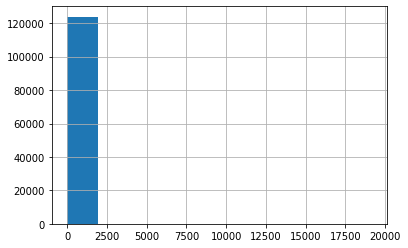

In [40]:
df["deaths"].hist()

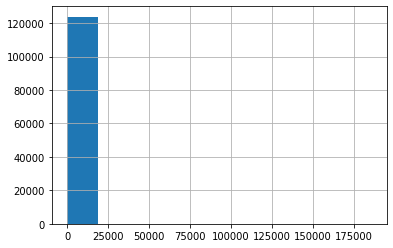

In [41]:
df["cases"].hist()

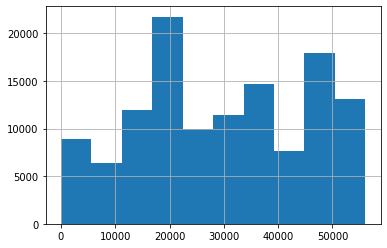

In [43]:
df["fips"].hist()